# Problem Statement

Insurance companies use various factors such as age, income, health status, and claim history to estimate premiums for customers. The goal of this project is to build a machine learning model that accurately predicts insurance premiums based on customer characteristics and policy details.

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [3]:
import pandas as pd
smart_prem = pd.read_csv('train.csv')
smart_prem.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


## Understanding about data

In [4]:
smart_prem.drop('id',axis=1,inplace=True)

In [5]:
smart_prem.shape

(1200000, 20)

In [6]:
smart_prem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [7]:
# Check for duplicate values.
smart_prem.duplicated().sum()

0

In [8]:
# Check for missing values.
df = pd.DataFrame(smart_prem.isna().sum(),columns=['Null Values'])
df.reset_index(inplace=True)

In [9]:
df.rename(columns={'index':'Columns'},inplace=True)

In [10]:
df['Percentage of Null Values'] = round(df['Null Values']*(100/smart_prem.shape[0]),4)

In [11]:
df

,Columns,Null Values,Percentage of Null Values
0,Age,18705,1.5587
1,Gender,0,0.0000
2,Annual Income,44949,3.7458
3,Marital Status,18529,1.5441
4,Number of Dependents,109672,9.1393
5,Education Level,0,0.0000
6,Occupation,358075,29.8396
7,Health Score,74076,6.1730
8,Location,0,0.0000
9,Policy Type,0,0.0000


In [12]:
for x in smart_prem.columns:
    print(f"{x} - {smart_prem[x].nunique()}")

Age - 47
Gender - 2
Annual Income - 88593
Marital Status - 3
Number of Dependents - 5
Education Level - 4
Occupation - 3
Health Score - 532657
Location - 3
Policy Type - 3
Previous Claims - 10
Vehicle Age - 20
Credit Score - 550
Insurance Duration - 9
Policy Start Date - 167381
Customer Feedback - 3
Smoking Status - 2
Exercise Frequency - 4
Property Type - 3
Premium Amount - 4794


In [13]:
smart_prem['Policy Start Date'] = pd.to_datetime(smart_prem['Policy Start Date'])

In [14]:
smart_categ = smart_prem.select_dtypes(include='object')
for x in smart_categ.columns:
    print(x)
    print(smart_prem[x].value_counts())

Gender
Male      602571
Female    597429
Name: Gender, dtype: int64
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: Marital Status, dtype: int64
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: Education Level, dtype: int64
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: Occupation, dtype: int64
Location
Suburban    401542
Rural       400947
Urban       397511
Name: Location, dtype: int64
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: Policy Type, dtype: int64
Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: Customer Feedback, dtype: int64
Smoking Status
Yes    601873
No     598127
Name: Smoking Status, dtype: int64
Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: Exercise Frequency, dtype: int64
Property Type
House        400349
Apartmen

## Data Visualization 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distributions of numerical features

In [16]:
smart_prem_num = smart_prem.select_dtypes(include='number')
smart_prem_num.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

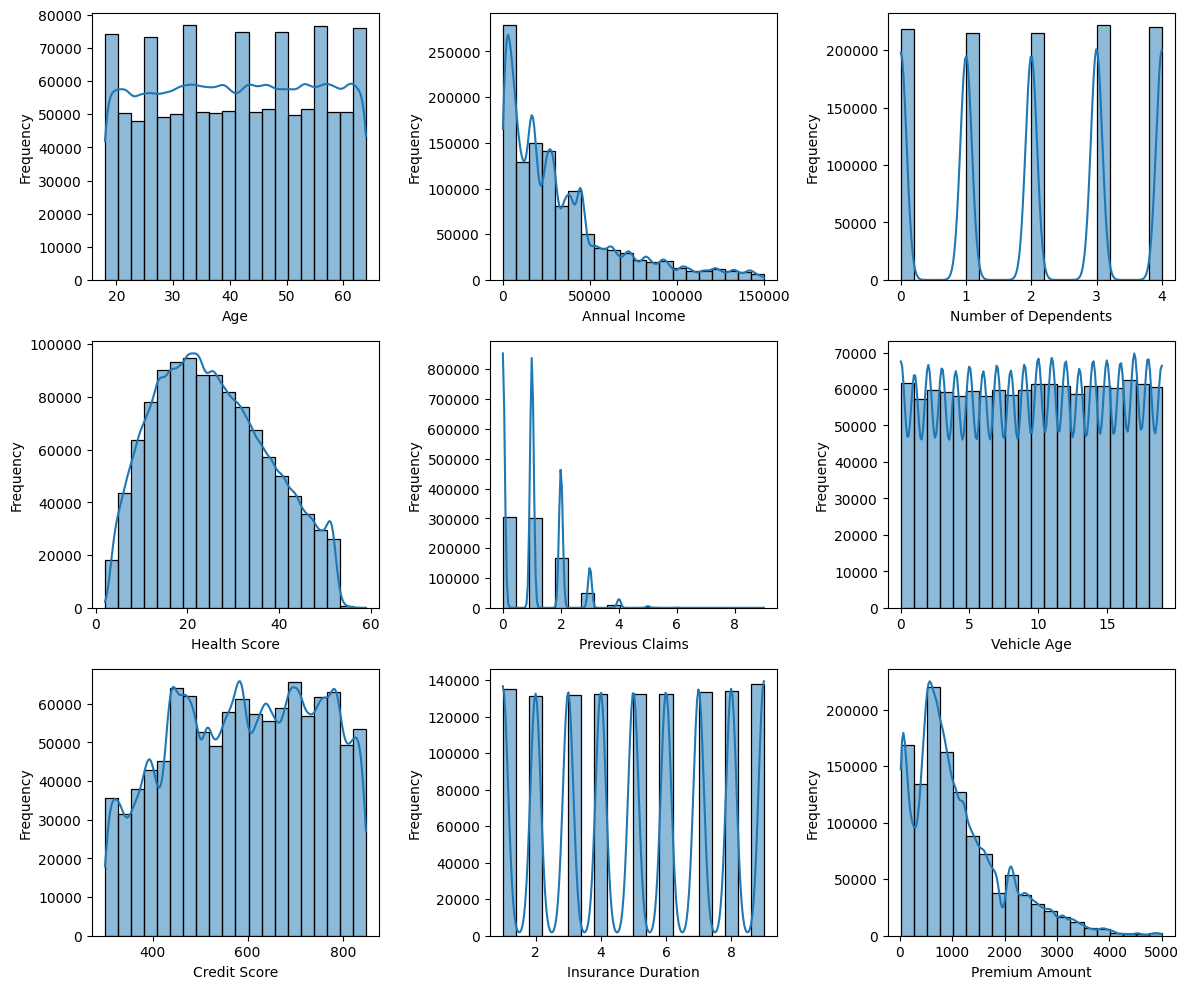

In [17]:
fig, ax = plt.subplots(3,3,figsize=(12,10))
sns.histplot(smart_prem_num['Age'],bins=20,kde=True,ax=ax[0,0])
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Annual Income'],bins=20,kde=True,ax=ax[0,1])
ax[0,1].set_xlabel('Annual Income')
ax[0,1].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Number of Dependents'],bins=20,kde=True,ax=ax[0,2])
ax[0,2].set_xlabel('Number of Dependents')
ax[0,2].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Health Score'],bins=20,kde=True,ax=ax[1,0])
ax[1,0].set_xlabel('Health Score')
ax[1,0].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Previous Claims'],bins=20,kde=True,ax=ax[1,1])
ax[1,1].set_xlabel('Previous Claims')
ax[1,1].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Vehicle Age'],bins=20,kde=True,ax=ax[1,2])
ax[1,2].set_xlabel('Vehicle Age')
ax[1,2].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Credit Score'],bins=20,kde=True,ax=ax[2,0])
ax[2,0].set_xlabel('Credit Score')
ax[2,0].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Insurance Duration'],bins=20,kde=True,ax=ax[2,1])
ax[2,1].set_xlabel('Insurance Duration')
ax[2,1].set_ylabel('Frequency')

sns.histplot(smart_prem_num['Premium Amount'],bins=20,kde=True,ax=ax[2,2])
ax[2,2].set_xlabel('Premium Amount')
ax[2,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of Categorical Features

In [18]:
smart_categ.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

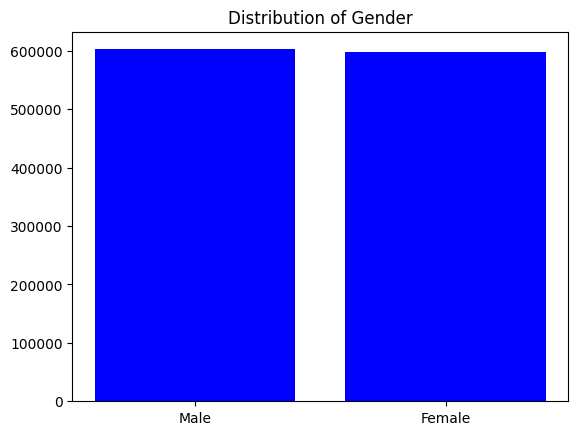

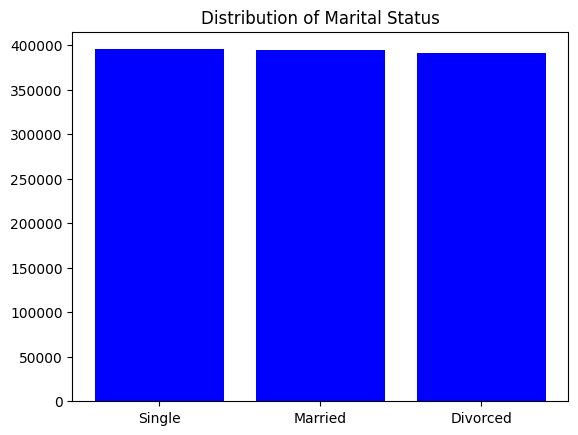

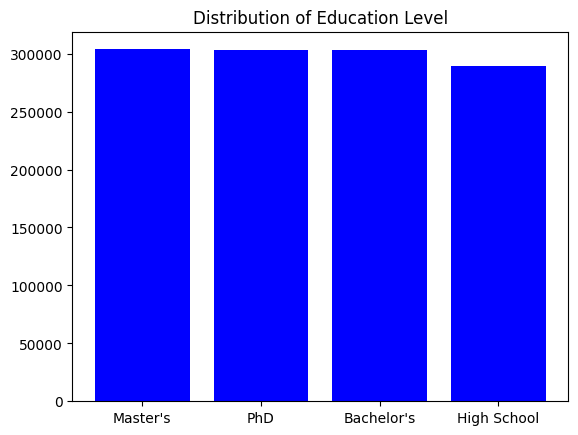

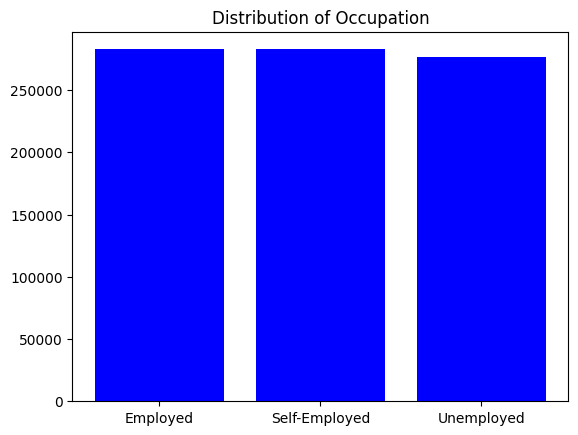

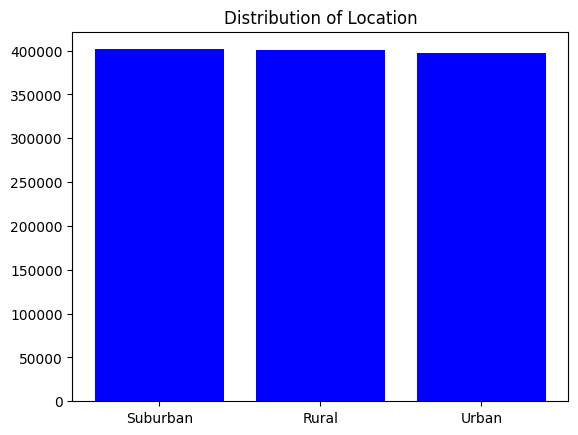

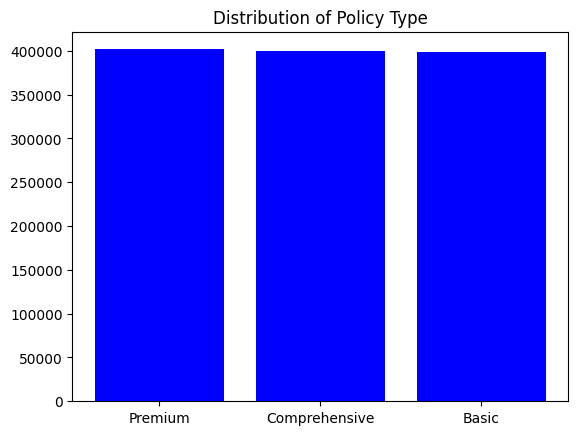

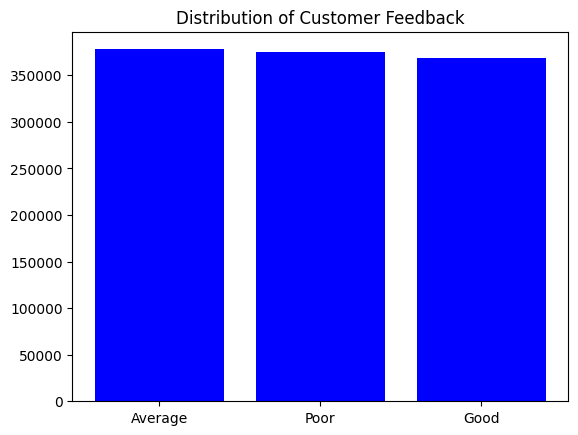

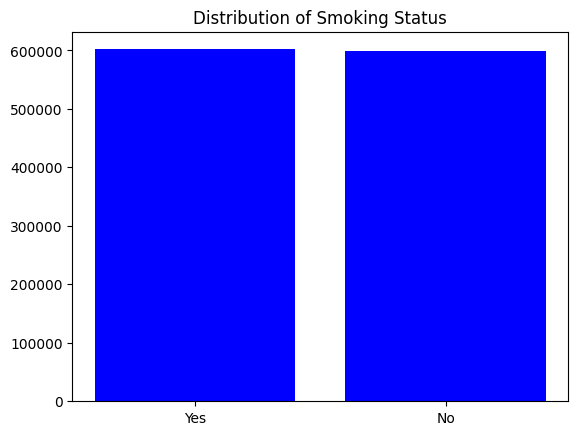

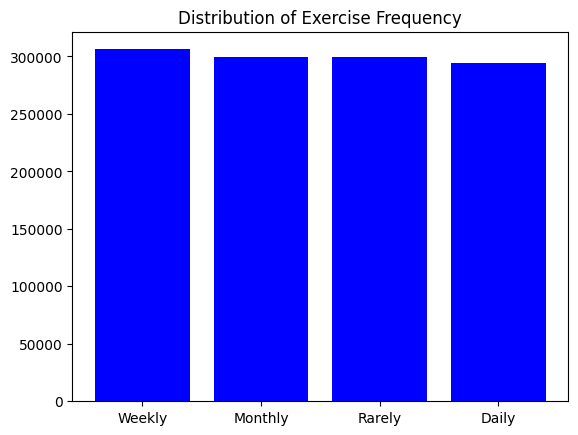

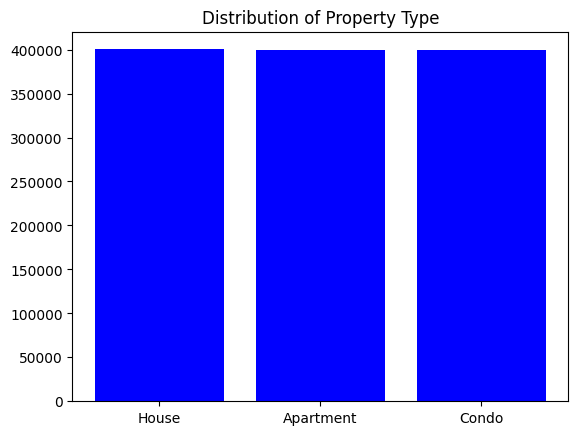

In [19]:
for x in smart_categ.columns:
    new_df = pd.DataFrame(smart_categ[x].value_counts())
    plt.bar(new_df.index,new_df[x],color='blue')
    plt.title(f"Distribution of {x}")
    plt.show()

## Data Cleaning & Preprocessing

In [20]:
smart_prem.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [21]:
smart_prem.isna().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [22]:
smart_prem.skew(axis=0,numeric_only=True)

Age                    -0.012532
Annual Income           1.470357
Number of Dependents   -0.013255
Health Score            0.282187
Previous Claims         0.905321
Vehicle Age            -0.020409
Credit Score           -0.113573
Insurance Duration     -0.008793
Premium Amount          1.240915
dtype: float64

In [23]:
# Drop of the null values present in Vehicle Age and Insurance Duration
smart_prem.dropna(subset=['Vehicle Age','Insurance Duration'],inplace=True)
smart_prem.reset_index(drop=True,inplace=True)

In [24]:
smart_prem.isna().sum()

Age                      18705
Gender                       0
Annual Income            44948
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358074
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364028
Vehicle Age                  0
Credit Score            137882
Insurance Duration           0
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [25]:
# Impute the numerical features with their median and categorical features with their corresponding mode
smart_num = smart_prem.select_dtypes(include='number')
smart_cat = smart_prem.select_dtypes(include='object')

In [26]:
dosa = """for x in smart_num.columns:
    smart_prem[x].fillna(smart_prem[x].median(),inplace=True)
for y in smart_cat.columns:
    smart_prem[y].fillna(smart_prem[y].mode()[0],inplace=True)"""

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import IterativeImputer

# Copy dataset
df_processed = smart_prem.drop('Policy Start Date',axis=1)

# Identify categorical & numerical columns
categorical_cols = smart_cat.columns.to_list()
numerical_cols = smart_num.columns.to_list()

# Encode only non-null categorical values
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    non_null_mask = df_processed[col].notnull()  # Mask for non-null values
    df_processed.loc[non_null_mask, col] = le.fit_transform(df_processed.loc[non_null_mask, col].astype(str))
    label_encoders[col] = le  # Store encoder for later decoding

# Convert categorical features to float (for imputation)
df_processed[categorical_cols] = df_processed[categorical_cols].astype(float)

# Scale numerical features
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

#  Apply Iterative Imputer for missing values
imputer = IterativeImputer(max_iter=20, random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df_processed), columns=df_processed.columns)

#  Reverse scaling for numerical features
df_imputed[numerical_cols] = scaler.inverse_transform(df_imputed[numerical_cols])

#  Decode categorical features back to original categories
df_final = smart_prem.drop('Policy Start Date',axis=1)
df_final[numerical_cols] = df_imputed[numerical_cols]

for col in categorical_cols:
    df_final[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))

In [28]:
smart_prem = pd.concat([df_final,smart_prem['Policy Start Date']],axis=1)

In [29]:
smart_prem.isna().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Policy Start Date       0
dtype: int64

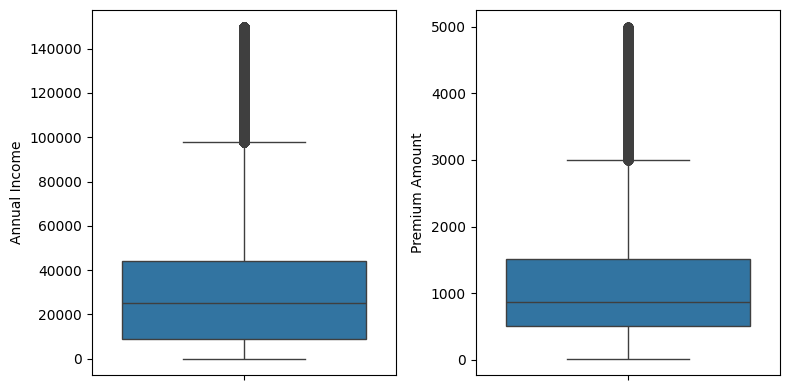

In [30]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(y=smart_prem['Annual Income'],ax=ax[0])
sns.boxplot(y=smart_prem['Premium Amount'],ax=ax[1])
plt.tight_layout()
plt.show()

In [31]:
Q1 = smart_prem['Annual Income'].quantile(0.25)
Q3 = smart_prem['Annual Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
smart_prem = smart_prem[(smart_prem['Annual Income'] >= lower_bound) & (smart_prem['Annual Income'] <= upper_bound)]


In [32]:
Q1 = smart_prem['Premium Amount'].quantile(0.25)
Q3 = smart_prem['Premium Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
smart_prem = smart_prem[(smart_prem['Premium Amount'] >= lower_bound) & (smart_prem['Premium Amount'] <= upper_bound)]

In [33]:
from scipy.stats.mstats import winsorize
smart_prem['Annual Income'] = winsorize(smart_prem['Annual Income'], limits=[0, 0.05]) 
smart_prem['Premium Amount'] = winsorize(smart_prem['Premium Amount'], limits=[0, 0.05])

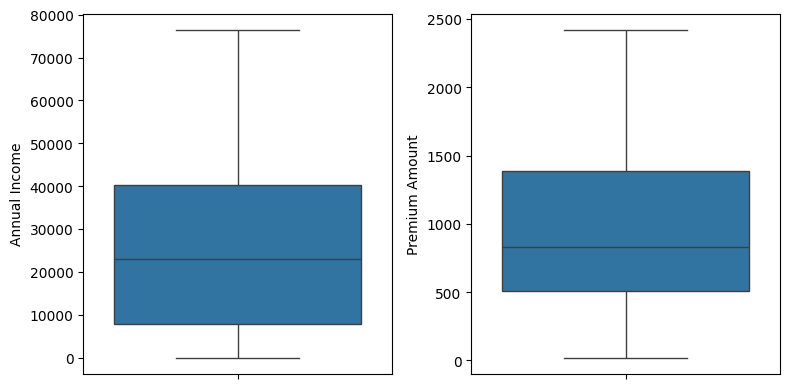

In [34]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(y=smart_prem['Annual Income'],ax=ax[0])
sns.boxplot(y=smart_prem['Premium Amount'],ax=ax[1])
plt.tight_layout()
plt.show()

In [35]:
smart_prem_ml = smart_prem.copy()

## Feature Manipulation & Selection

In [36]:
smart_prem_ml['Policy_Year'] = smart_prem_ml['Policy Start Date'].dt.year
smart_prem_ml['Policy_Month'] = smart_prem_ml['Policy Start Date'].dt.month
smart_prem_ml['Policy_Day'] = smart_prem_ml['Policy Start Date'].dt.day 

In [37]:
smart_prem_ml.drop(['Policy Start Date'],axis=1,inplace=True)

### Comparison of Numerical Features

In [38]:
smart_num = smart_prem_ml.select_dtypes(include='number')

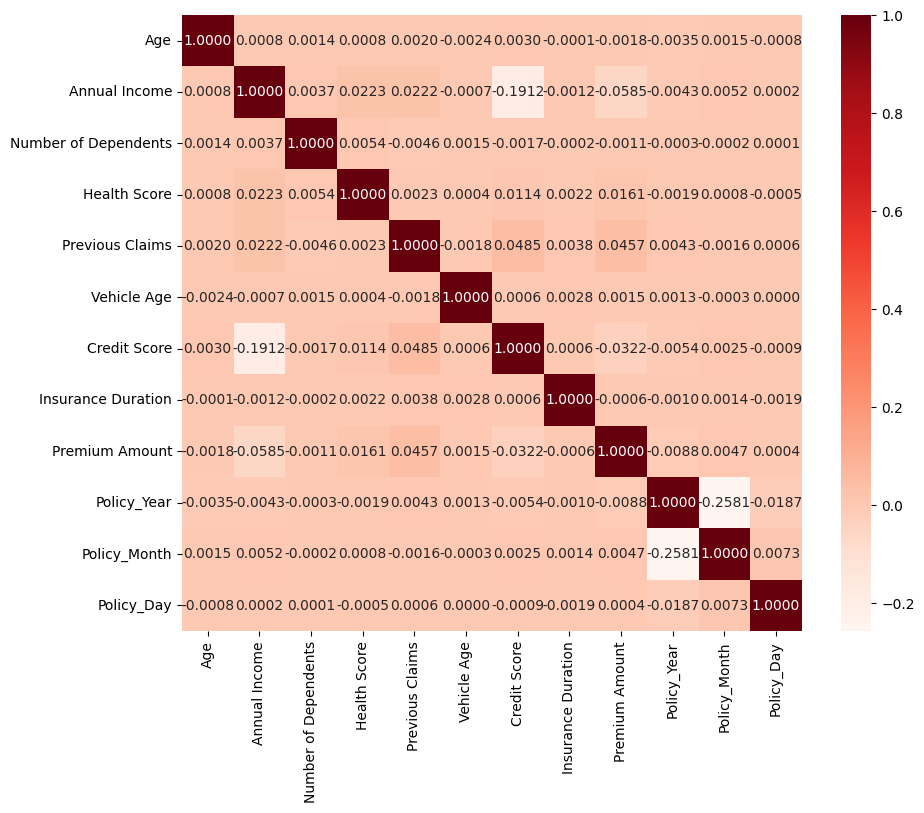

In [39]:
corr_matrix = smart_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='Reds',fmt='.4f')
plt.show()

In [41]:
smart_prem_ml1 = smart_prem_ml.drop(['Insurance Duration','Policy_Day'],axis=1)

### Comparison of numerical and categorical features

In [42]:
smart_cat = smart_prem_ml1.select_dtypes(include='object')
smart_num = smart_prem_ml1.select_dtypes(include='number')
# ANOVA to compare numeric and categorical features
dict_cat = {}
from scipy.stats import f_oneway
for cat_var in smart_cat.columns:
    lis_num = []
    for num_var in smart_num.columns:
        # Group numerical data by the categorical variable
        groups = [group[num_var].values for _, group in smart_prem_ml.groupby(cat_var)]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        if  p_value < 0.05:
            lis_num.append("Yes")
        else:
            lis_num.append("No")
        print(f"ANOVA for {num_var} grouped by {cat_var}:")
        print(f"  F-Statistic: {f_stat}")
        print(f"  P-Value: {p_value}")
        print("  Significant?" + (" Yes" if p_value < 0.05 else " No"))
        print("-" * 40)
    dict_cat[cat_var] = lis_num

ANOVA for Age grouped by Gender:
  F-Statistic: 0.027734451982538
  P-Value: 0.8677346835603366
  Significant? No
----------------------------------------
ANOVA for Annual Income grouped by Gender:
  F-Statistic: 2.127625645697026
  P-Value: 0.14466498047195306
  Significant? No
----------------------------------------
ANOVA for Number of Dependents grouped by Gender:
  F-Statistic: 1.008746422798024
  P-Value: 0.3152035690486785
  Significant? No
----------------------------------------
ANOVA for Health Score grouped by Gender:
  F-Statistic: 15.737358390646014
  P-Value: 7.27773061984623e-05
  Significant? Yes
----------------------------------------
ANOVA for Previous Claims grouped by Gender:
  F-Statistic: 0.2885674150025799
  P-Value: 0.5911401406319241
  Significant? No
----------------------------------------
ANOVA for Vehicle Age grouped by Gender:
  F-Statistic: 0.6897305607977774
  P-Value: 0.4062562251828673
  Significant? No
----------------------------------------
ANOVA f

ANOVA for Policy_Year grouped by Location:
  F-Statistic: 1.0618339446473042
  P-Value: 0.34582137179474953
  Significant? No
----------------------------------------
ANOVA for Policy_Month grouped by Location:
  F-Statistic: 0.27950632824022215
  P-Value: 0.756156997184474
  Significant? No
----------------------------------------
ANOVA for Age grouped by Policy Type:
  F-Statistic: 0.6366853028353405
  P-Value: 0.5290433367525409
  Significant? No
----------------------------------------
ANOVA for Annual Income grouped by Policy Type:
  F-Statistic: 2.469161106592358
  P-Value: 0.08465632295749677
  Significant? No
----------------------------------------
ANOVA for Number of Dependents grouped by Policy Type:
  F-Statistic: 1.0423776807590936
  P-Value: 0.3526156315603547
  Significant? No
----------------------------------------
ANOVA for Health Score grouped by Policy Type:
  F-Statistic: 2.3492439587836604
  P-Value: 0.0954417787950882
  Significant? No
---------------------------

ANOVA for Vehicle Age grouped by Property Type:
  F-Statistic: 5.124544879433039
  P-Value: 0.005949068454900033
  Significant? Yes
----------------------------------------
ANOVA for Credit Score grouped by Property Type:
  F-Statistic: 0.1375582091674609
  P-Value: 0.8714836354669342
  Significant? No
----------------------------------------
ANOVA for Premium Amount grouped by Property Type:
  F-Statistic: 0.7473759121956198
  P-Value: 0.4736079561377392
  Significant? No
----------------------------------------
ANOVA for Policy_Year grouped by Property Type:
  F-Statistic: 0.5372732215954314
  P-Value: 0.5843396019236862
  Significant? No
----------------------------------------
ANOVA for Policy_Month grouped by Property Type:
  F-Statistic: 4.727517261750047
  P-Value: 0.008848594664494908
  Significant? Yes
----------------------------------------


In [43]:
anova_df = pd.DataFrame(dict_cat)
anova_df.set_index(smart_num.columns,inplace=True)
anova_df

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
Age,No,Yes,No,Yes,No,No,Yes,No,No,No
Annual Income,No,Yes,No,Yes,No,No,Yes,No,Yes,No
Number of Dependents,No,No,No,Yes,No,No,Yes,No,Yes,Yes
Health Score,Yes,No,Yes,Yes,Yes,No,Yes,No,No,Yes
Previous Claims,No,Yes,No,No,No,Yes,Yes,No,No,Yes
Vehicle Age,No,Yes,No,No,No,No,Yes,No,No,Yes
Credit Score,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No
Premium Amount,No,No,No,No,No,No,Yes,No,No,No
Policy_Year,No,Yes,No,Yes,No,Yes,No,No,No,No
Policy_Month,No,No,No,Yes,No,No,Yes,No,No,Yes


### Comparison of Categorical Features

In [44]:
from scipy.stats import chi2_contingency
dict_cat = {}
for i in range(len(smart_cat.columns)):
    lis_cat = []
    for j in range(len(smart_cat.columns)):
        feature1 = smart_cat.columns[i]
        feature2 = smart_cat.columns[j]
        
        # Create contingency table
        contingency_table = pd.crosstab(smart_prem_ml[feature1],smart_prem_ml[feature2])
        
        # Perform Chi-Squared Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        if p < 0.05:
            lis_cat.append("Yes")
        else:
            lis_cat.append("No")
        
        # Print results
        print(f"Chi-Squared Test between {feature1} and {feature2}:")
        print(f"Chi-Squared Statistic: {chi2:.2f}, P-Value: {p:.4f}, Degrees of Freedom: {dof}")
        print("Statistically Significant: Yes") if p<0.05 else print("Statistically Significant: No")
        dict_cat[feature1] = lis_cat

Chi-Squared Test between Gender and Gender:
Chi-Squared Statistic: 1083109.00, P-Value: 0.0000, Degrees of Freedom: 1
Statistically Significant: Yes
Chi-Squared Test between Gender and Marital Status:
Chi-Squared Statistic: 21.03, P-Value: 0.0000, Degrees of Freedom: 2
Statistically Significant: Yes
Chi-Squared Test between Gender and Education Level:
Chi-Squared Statistic: 1.03, P-Value: 0.7946, Degrees of Freedom: 3
Statistically Significant: No
Chi-Squared Test between Gender and Occupation:
Chi-Squared Statistic: 4.93, P-Value: 0.0849, Degrees of Freedom: 2
Statistically Significant: No
Chi-Squared Test between Gender and Location:
Chi-Squared Statistic: 2.10, P-Value: 0.3507, Degrees of Freedom: 2
Statistically Significant: No
Chi-Squared Test between Gender and Policy Type:
Chi-Squared Statistic: 4.72, P-Value: 0.0943, Degrees of Freedom: 2
Statistically Significant: No
Chi-Squared Test between Gender and Customer Feedback:
Chi-Squared Statistic: 40.86, P-Value: 0.0000, Degrees o

Chi-Squared Test between Policy Type and Occupation:
Chi-Squared Statistic: 19.06, P-Value: 0.0008, Degrees of Freedom: 4
Statistically Significant: Yes
Chi-Squared Test between Policy Type and Location:
Chi-Squared Statistic: 6.04, P-Value: 0.1964, Degrees of Freedom: 4
Statistically Significant: No
Chi-Squared Test between Policy Type and Policy Type:
Chi-Squared Statistic: 2166226.00, P-Value: 0.0000, Degrees of Freedom: 4
Statistically Significant: Yes
Chi-Squared Test between Policy Type and Customer Feedback:
Chi-Squared Statistic: 125.33, P-Value: 0.0000, Degrees of Freedom: 4
Statistically Significant: Yes
Chi-Squared Test between Policy Type and Smoking Status:
Chi-Squared Statistic: 5.64, P-Value: 0.0597, Degrees of Freedom: 2
Statistically Significant: No
Chi-Squared Test between Policy Type and Exercise Frequency:
Chi-Squared Statistic: 19.03, P-Value: 0.0041, Degrees of Freedom: 6
Statistically Significant: Yes
Chi-Squared Test between Policy Type and Property Type:
Chi-Sq

In [45]:
chi_df = pd.DataFrame(dict_cat)
chi_df.set_index(smart_cat.columns,inplace=True)
chi_df

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
Gender,Yes,Yes,No,No,No,No,Yes,Yes,No,No
Marital Status,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes
Education Level,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes
Occupation,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Location,No,No,Yes,Yes,Yes,No,Yes,No,No,No
Policy Type,No,No,No,Yes,No,Yes,Yes,No,Yes,No
Customer Feedback,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Smoking Status,Yes,No,No,Yes,No,No,Yes,Yes,No,No
Exercise Frequency,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No
Property Type,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes


## Scaling and Encoding

In [68]:
smart_prem_num = smart_prem_ml1.select_dtypes(include='number')
smart_prem_cat = smart_prem_ml1.select_dtypes(include='object')

In [69]:
X = smart_prem_num.drop("Premium Amount",axis=1)
X.reset_index(drop=True,inplace=True)
Y = smart_prem_num["Premium Amount"]

In [70]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ord_mapping = {
    'Customer Feedback':['Poor', 'Average', 'Good'],
    "Exercise Frequency":['Rarely','Monthly','Weekly','Daily'],
    "Education Level":['High School',"Bachelor's","Master's",'PhD'],
    "Smoking Status":['No','Yes']
}
ord_smart = OrdinalEncoder(categories=[ord_mapping[col] for col in ord_mapping])
smart_prem_ord = ord_smart.fit_transform(smart_prem_cat[list(ord_mapping.keys())])

In [71]:
smart_prem_ord = pd.DataFrame(smart_prem_ord,columns=ord_mapping.keys())

In [72]:
from sklearn.preprocessing import OneHotEncoder
smart_prem_ohe = smart_prem_cat.drop(list(ord_mapping.keys()),axis=1)
ohe_smart = OneHotEncoder(sparse_output=False)
smart_prem_ohe_tf = ohe_smart.fit_transform(smart_prem_ohe)

In [73]:
smart_prem_ohe_tf = pd.DataFrame(smart_prem_ohe_tf,columns=ohe_smart.get_feature_names_out())

In [74]:
X_new = pd.concat([X,smart_prem_ord,smart_prem_ohe_tf],axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler
smart_sc = StandardScaler()
X_sc = smart_sc.fit_transform(X_new.values)

## Model Training & Evaluation

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sc,Y,test_size=0.2)

### ML model 1

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train,Y_train)

# Train prediction
Y_trpred = lr.predict(X_train)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))

# Test prediction
Y_pred = lr.predict(X_test)
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 661.8032185847569
Train R2 0.008378784710201703
Test RMSE 662.0057826060491
Test R2 0.008307651262872362


### ML model 2

In [78]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

# Train prediction
Y_trpred = dt.predict(X_train)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))

# Test prediction
Y_pred = dt.predict(X_test)
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 7.479008775942899e-17
Train R2 1.0
Test RMSE 743.7254355044324
Test R2 -0.25163778637878287


### ML model 3

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=377,max_depth=20,min_samples_split=8,min_samples_leaf=3,random_state=42,n_jobs=-1)
rf.fit(X_train,Y_train)

# Train prediction
Y_trpred = rf.predict(X_train)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))

# Test prediction
Y_pred = rf.predict(X_test)
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 421.3421903723263
Train R2 0.5980630273914685
Test RMSE 520.4766936133615
Test R2 0.38700635721503385


### ML model 4

In [79]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

# Train prediction
Y_trpred = xgb.predict(X_train)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))

# Test prediction
Y_pred = xgb.predict(X_test)
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 533.6781959502193
Train R2 0.35516740967189053
Test RMSE 539.679012149848
Test R2 0.3409407583755969


In [82]:
import joblib
# Save the ml model
joblib.dump(rf,'random_forest_smart.pkl')

# Save the ordinal encoder
joblib.dump(ord_smart,'ordinal_encoder_smart.pkl')

# Save the onehot encoder
joblib.dump(ohe_smart,'ohe_encoder_smart.pkl')

# Save the scaler
joblib.dump(smart_sc,'scaler_smart.pkl')

['scaler_smart.pkl']

In [83]:
loaded_rf = joblib.load('random_forest_smart.pkl')

loaded_ord = joblib.load('ordinal_encoder_smart.pkl')

loaded_ohe = joblib.load('ohe_encoder_smart.pkl')

loaded_sc = joblib.load('scaler_smart.pkl')

0-Age, 1-Annual Income, 2-Number of Dependents, 3-Health Score, 4-Previous Claims, 5-Vehicle Age, 6-Credit Score, 7-Policy Year, 8-Policy Month,
9-Customer Feedback, 10-Exercise Frequency, 11-Education Level, 12-Somking Status,
13-Gender, 14-Marital Status, 15-Occupation, 16-Location, 17-Policy Type, 18-Property Type

In [114]:
import numpy as np
X_val = np.array([[39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2023,6,
                   'Average','Monthly',"Master's",'Yes',
                   'Female','Divorced','Employed','Rural','Comprehensive','House']])
X_num = X_val[:,[0,1,2,3,4,5,6,7,8]]
X_ord = loaded_ord.transform(X_val[:,[9,10,11,12]])
X_ohe = loaded_ohe.transform(X_val[:,[13,14,15,16,17,18]])
X_ref = np.concatenate((X_num,X_ord,X_ohe),axis=1)
X_ref = loaded_sc.transform(X_ref)
Prem_pred = loaded_rf.predict(X_ref)
print(f"Predicted Premium {Prem_pred[0]:.2f}")

Predicted Premium 941.81


In [91]:
smart_prem.iloc[1,:]

Age                                           39.0
Gender                                      Female
Annual Income                              31678.0
Marital Status                            Divorced
Number of Dependents                           3.0
Education Level                           Master's
Occupation                                Employed
Health Score                             15.569731
Location                                     Rural
Policy Type                          Comprehensive
Previous Claims                                1.0
Vehicle Age                                   12.0
Credit Score                                 694.0
Insurance Duration                             2.0
Customer Feedback                          Average
Smoking Status                                 Yes
Exercise Frequency                         Monthly
Property Type                                House
Premium Amount                              1483.0
Policy Start Date       2023-06

In [86]:
X.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Policy_Year',
       'Policy_Month'],
      dtype='object')

In [87]:
smart_prem_ord.columns

Index(['Customer Feedback', 'Exercise Frequency', 'Education Level',
       'Smoking Status'],
      dtype='object')

In [88]:
smart_prem_ohe.columns

Index(['Gender', 'Marital Status', 'Occupation', 'Location', 'Policy Type',
       'Property Type'],
      dtype='object')

In [90]:
X.shape[1]+smart_prem_ord.shape[1]+smart_prem_ohe.shape[1]

19

In [105]:
smart_prem_ml1.to_csv('Smart Premium.csv',index=False)

In [106]:
smart_prem_ml1 = pd.read_csv('Smart Premium.csv')

In [110]:
smart_prem_ml1

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Year,Policy_Month
0,19.0,Female,10049.000000,Married,1.000000,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.000000,17.0,372.000000,Poor,No,Weekly,House,2421.0,2023,12
1,39.0,Female,31678.000000,Divorced,3.000000,Master's,Employed,15.569731,Rural,Comprehensive,1.000000,12.0,694.000000,Average,Yes,Monthly,House,1483.0,2023,6
2,23.0,Male,25602.000000,Divorced,3.000000,High School,Self-Employed,47.177549,Suburban,Premium,1.000000,14.0,608.867931,Good,Yes,Weekly,House,567.0,2023,9
3,21.0,Male,39651.000000,Single,1.000000,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.000000,8.0,598.000000,Poor,Yes,Weekly,House,2022.0,2021,12
4,41.0,Male,40336.000000,Married,0.000000,PhD,Employed,25.924813,Rural,Basic,2.000000,8.0,807.000000,Poor,No,Weekly,House,439.0,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083108,36.0,Female,27316.000000,Married,0.000000,Master's,Unemployed,13.772907,Urban,Premium,0.921199,5.0,372.000000,Poor,No,Daily,Apartment,1303.0,2023,5
1083109,54.0,Male,35786.000000,Divorced,2.001956,Master's,Self-Employed,11.483482,Rural,Comprehensive,0.993868,10.0,597.000000,Poor,No,Weekly,Apartment,821.0,2022,9
1083110,19.0,Male,51884.000000,Divorced,0.000000,Master's,Employed,14.724469,Suburban,Basic,0.000000,19.0,565.842695,Good,No,Monthly,Condo,371.0,2021,5
1083111,55.0,Male,41759.196111,Single,1.000000,PhD,Employed,18.547381,Suburban,Premium,1.000000,7.0,407.000000,Poor,No,Daily,Apartment,596.0,2021,9
